# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [44]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [45]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [46]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [48]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [49]:
df_data.shape


(4324, 9)

In [50]:
print(df_data.columns)
df_data.Price = pd.to_numeric(df_data.Price.str.replace(',', ''))
df_data.Date = pd.to_datetime(df_data.Date, format='mixed', dayfirst=True)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [51]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [52]:
df_data.duplicated().sum()

0

In [53]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [54]:
df_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [55]:
df_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

## Descriptive Statistics

In [56]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [57]:
org = df_data.groupby("Organisation").count().sort_values("Location",ascending=False)[:20]
print(org)

                  Location  Date  Detail  Rocket_Status  Price  Mission_Status
Organisation                                                                  
RVSN USSR             1777  1777    1777           1777      2            1777
Arianespace            279   279     279            279     96             279
General Dynamics       251   251     251            251      0             251
CASC                   251   251     251            251    158             251
NASA                   203   203     203            203    149             203
VKS RF                 201   201     201            201     33             201
US Air Force           161   161     161            161     26             161
ULA                    140   140     140            140     98             140
Boeing                 136   136     136            136      7             136
Martin Marietta        114   114     114            114      9             114
SpaceX                 100   100     100            

<Axes: xlabel='Location', ylabel='Organisation'>

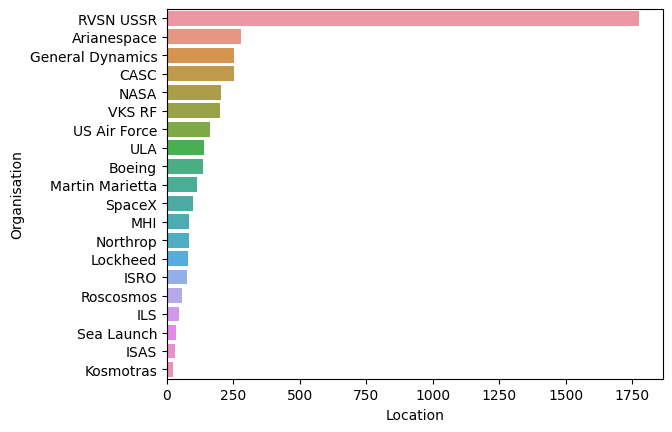

In [58]:
sns.barplot(y=org.index,x=org["Location"],)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [59]:
df_data["Rocket_Status"].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [60]:
df_data.groupby("Rocket_Status").count()

,Organisation,Location,Date,Detail,Price,Mission_Status
Rocket_Status,,,,,,
StatusActive,790,790,790,790,586,790
StatusRetired,3534,3534,3534,3534,378,3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [61]:
df_data.groupby("Mission_Status").count()

,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,
Failure,339,339,339,339,339,36
Partial Failure,102,102,102,102,102,17
Prelaunch Failure,4,4,4,4,4,1
Success,3879,3879,3879,3879,3879,910


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

<Axes: xlabel='Price', ylabel='Count'>

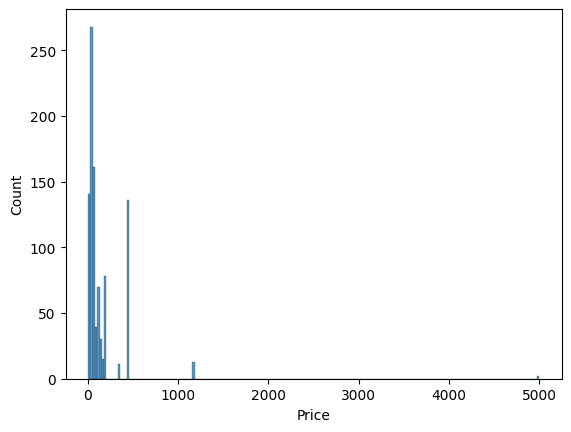

In [62]:
sns.histplot(df_data,x="Price")

In [63]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [64]:

df_data['Pays'] = df_data.Location.str.split(',').str[3]
df_data['Pays'] = df_data['Pays'].fillna(df_data.Location.str.split(',').str[2]) 
df_data['Pays'] = df_data['Pays'].fillna(df_data.Location.str.split(',').str[1]) 
df_data['Pays'] = df_data['Pays'].fillna(df_data.Location.str.split(',').str[0]) 
print(df_data.head())

  Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Date                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status         Pays  
0  StatusActive  50.00        Success          USA  
1  StatusA

In [65]:

import pycountry


def get_iso_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)
        if country:
            return country[0].alpha_3
        else:
            return None
    except LookupError:
        return None


# Ajouter une colonne 'Code ISO' au DataFrame
df_data['Code_ISO'] = df_data['Pays'].apply(get_iso_code)


# Afficher le DataFrame avec les codes ISO



In [66]:
country = df_data.groupby("Code_ISO").count()
print(country)
import plotly.express as px

fig = px.choropleth(country, 
                    locations=country.index,
                    color="Detail",  # Specify the column name for color encoding
                    hover_name="Pays",
                    color_continuous_scale=px.colors.sequential.matter)

fig.show()

          Organisation  Location  Date  Detail  Rocket_Status  Price  \
Code_ISO                                                               
AUS                  6         6     6       6              6      0   
BRA                  3         3     3       3              3      0   
CHN                268       268   268     268            268    158   
FRA                303       303   303     303            303     95   
IND                 76        76    76      76             76     67   
IRN                 13        13    13      13             13      0   
ISR                 11        11    11      11             11      0   
JPN                126       126   126     126            126     40   
KAZ                701       701   701     701            701     46   
KEN                  9         9     9       9              9      0   
KOR                  3         3     3       3              3      0   
NZL                 13        13    13      13             13   

# Use a Choropleth Map to Show the Number of Failures by Country


In [67]:
df_data['Status_Bool'] = df_data['Mission_Status']=="Success"

In [68]:
country = df_data.groupby("Code_ISO")['Status_Bool'].sum()
print(country)
import plotly.express as px

fig = px.choropleth(country, 
                    locations=country.index,
                    color=country.values,  # Specify the column name for color encoding
                    hover_name=country.index,
                    color_continuous_scale=px.colors.sequential.matter)

fig.show()

Code_ISO
AUS       3
BRA       0
CHN     243
FRA     285
IND      63
IRN       4
ISR       9
JPN     113
KAZ     608
KEN       9
KOR       1
NZL      11
PRK       2
RUS    1303
USA    1186
Name: Status_Bool, dtype: int64


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [69]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Pays,Code_ISO,Status_Bool
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,True
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,True
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,True
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,True
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,True


In [70]:
burst = px.sunburst(df_data, 
                    path=['Pays', 'Organisation'], 
                    values='Status_Bool',
                    title='Where do rocket launches ?',
                   )
 
burst.update_layout(xaxis_title='Number of Mission_Status', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [71]:
burst = px.sunburst(df_data, 
                    path=['Pays', 'Organisation'], 
                    values='Price',
                    title='Price spent by Mission_Status?',
                   )
 
burst.update_layout(xaxis_title='Number of Mission_Status', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [72]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Pays,Code_ISO,Status_Bool
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,True
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,True
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,True
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,True
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,True


In [73]:
df_data.groupby("Organisation")["Price"].mean().sort_values(ascending=False)[:20]

Organisation
RVSN USSR         5,000.00
NASA                511.95
Boeing              177.29
Arianespace         170.26
ULA                 151.00
ILS                 101.54
MHI                  95.47
Martin Marietta      80.16
US Air Force         59.65
JAXA                 56.00
SpaceX               54.99
Roscosmos            51.63
Northrop             47.35
VKS RF               46.94
Eurockot             41.80
CASC                 40.13
ESA                  37.00
Lockheed             35.00
ISRO                 32.49
Kosmotras            29.00
Name: Price, dtype: float64

In [74]:
df_data.Date

0       2020-08-07 05:12:00+00:00
1       2020-08-06 04:01:00+00:00
2       2020-08-04 23:57:00+00:00
3       2020-07-30 21:25:00+00:00
4       2020-07-30 11:50:00+00:00
                  ...            
4319    1958-02-05 07:33:00+00:00
4320    1958-02-01 03:48:00+00:00
4321    1957-12-06 16:44:00+00:00
4322    1957-11-03 02:30:00+00:00
4323    1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: object

# Chart the Number of Launches per Year

In [75]:
df_data['year'] = (df_data.Date.astype(str)).str.split('-').str[0]

df_data['year'].unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997',
       '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973',
       '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965',
       '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957'],
      dtype=object)

In [76]:
df_data.groupby("year").count()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Pays,Code_ISO,Status_Bool
year,,,,,,,,,,
1957,3,3,3,3,3,0,3,3,3,3
1958,28,28,28,28,28,0,28,28,28,28
1959,20,20,20,20,20,0,20,20,20,20
1960,39,39,39,39,39,0,39,39,39,39
1961,52,52,52,52,52,0,52,52,52,52
...,...,...,...,...,...,...,...,...,...,...
2016,90,90,90,90,90,64,90,90,90,90
2017,92,92,92,92,92,66,92,92,92,92
2018,117,117,117,117,117,88,117,117,117,117


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [77]:
df_data['Month_Year'] = (df_data.Date.astype(str)).str.split('-').str[0] + "-" + (df_data.Date.astype(str)).str.split('-').str[1]

In [78]:
df_data.groupby("Month_Year").count().sort_values("Organisation",ascending=False)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Pays,Code_ISO,Status_Bool,year
Month_Year,,,,,,,,,,,
1971-12,18,18,18,18,18,0,18,18,18,18,18
1977-09,16,16,16,16,16,0,16,16,16,16,16
1975-09,16,16,16,16,16,0,16,16,16,16,16
2019-12,16,16,16,16,16,9,16,16,16,16,16
1968-04,16,16,16,16,16,2,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...
1981-07,1,1,1,1,1,0,1,1,1,1,1
1980-09,1,1,1,1,1,0,1,1,1,1,1
1980-08,1,1,1,1,1,0,1,1,1,1,1


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [79]:
df_data['Month'] = (df_data.Date.astype(str)).str.split('-').str[1]

In [80]:
df_data.groupby("Month").count().sort_values("Organisation",ascending=False)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Pays,Code_ISO,Status_Bool,year,Month_Year
Month,,,,,,,,,,,,
12,450,450,450,450,450,92,450,450,449,450,450,450
06,402,402,402,402,402,85,402,402,394,402,402,402
04,383,383,383,383,383,91,383,383,378,383,383,383
10,381,381,381,381,381,83,381,381,377,381,381,381
08,373,373,373,373,373,82,373,373,369,373,373,373
09,365,365,365,365,365,88,365,365,363,365,365,365
03,353,353,353,353,353,77,353,353,348,353,353,353
07,351,351,351,351,351,77,351,351,348,351,351,351
02,336,336,336,336,336,60,336,336,334,336,336,336


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [81]:
priceovertime =df_data.groupby("year")["Price"].sum()

<Axes: xlabel='year'>

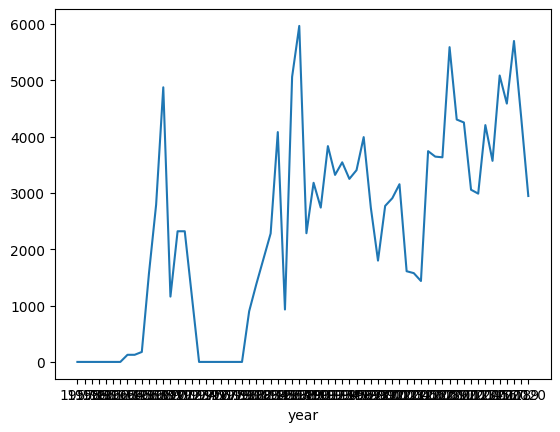

In [82]:
sns.lineplot(x=priceovertime.index, y=priceovertime.values)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [83]:
df_data['Month_Year'] = pd.to_datetime(df_data['Month_Year'])

launch_counts = df_data.groupby(['Organisation', 'Month_Year']).size().reset_index(name='count')
top_10_organisations = launch_counts.groupby('Organisation')['count'].sum().nlargest(10).index.tolist()
top_10_data = launch_counts[launch_counts['Organisation'].isin(top_10_organisations)]



C:\Users\henri.peters\AppData\Roaming\Local\Temp\ipykernel_22596\3767433195.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



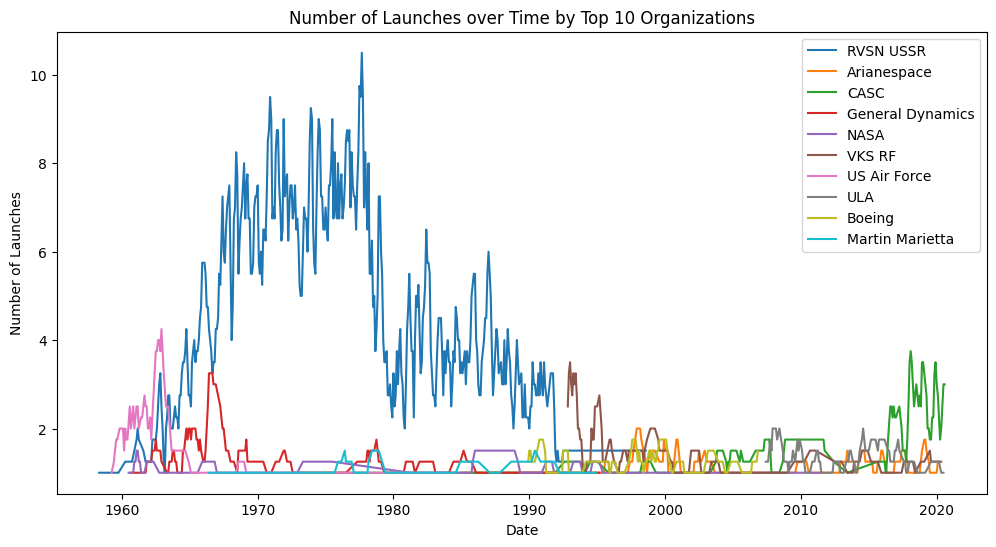

In [86]:
plt.figure(figsize=(12, 6))

for org in top_10_organisations:
    org_data = top_10_data[top_10_data['Organisation'] == org]
    org_data_rolling = org_data
    org_data_rolling['count'] = org_data['count'].rolling(window=10).mean()
    plt.plot(org_data_rolling['Month_Year'], org_data_rolling['count'], label=org)

plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.title('Number of Launches over Time by Top 10 Organizations')
plt.legend()
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [87]:
df_data['Month_Year'] = pd.to_datetime(df_data['Month_Year'])

launch_counts = df_data.groupby(['Pays', 'Month_Year']).size().reset_index(name='count')
top_10_organisations = launch_counts.groupby('Pays')['count'].sum().nlargest(10).index.tolist()
top_10_data = launch_counts[launch_counts['Pays'].isin(top_10_organisations)]



C:\Users\henri.peters\AppData\Roaming\Local\Temp\ipykernel_22596\490815701.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



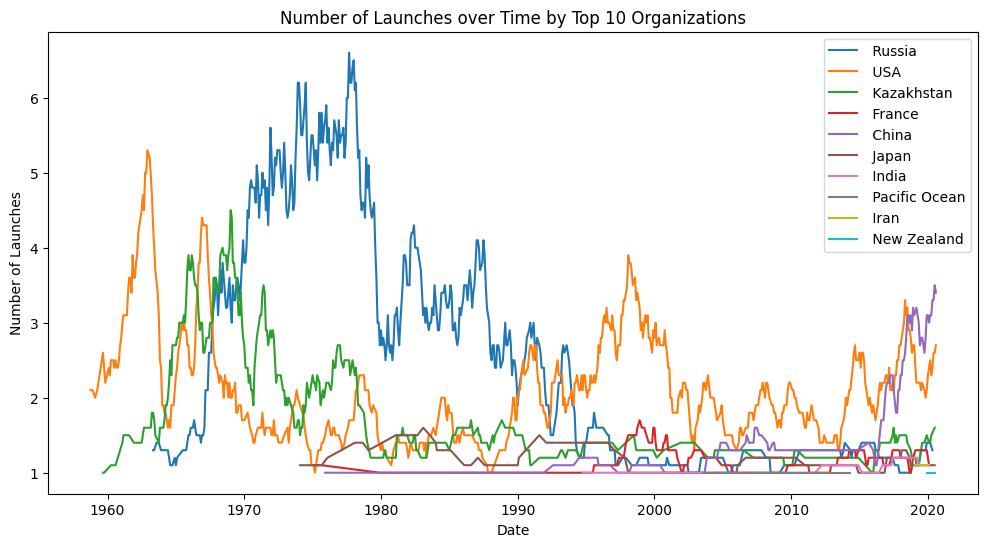

In [89]:
plt.figure(figsize=(12, 6))

for org in top_10_organisations:
    org_data = top_10_data[top_10_data['Pays'] == org]
    org_data_rolling = org_data
    org_data_rolling['count'] = org_data['count'].rolling(window=10).mean()
    plt.plot(org_data_rolling['Month_Year'], org_data_rolling['count'], label=org)

plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.title('Number of Launches over Time by Top 10 Organizations')
plt.legend()
plt.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 